# **Guided Project: Star Wars Survey**

Made by Jaime Bibiloni on July 2020

---

# **Star Wars Saga: Revealing fan's favorites**

---

## **Introduction**

We are going to clean and analyze a data set containing answers to a survey about the Star Wars movie saga. Besides providing some demographic information, the fans were asked several questions about Star Wars: movies they had seen, their favorite one, their opinion on the characters, etc. 

The survey was carried out by data-journalism site [538](https://www.fivethirtyeight.com) through the online polling service [SurveyMonkey](https://www.surveymonkey.com). 1185 people answered the survey.

We will find out what is the most watched movie, the top ranked one, the fan's favorite character, and whether there were any gender differences when answering those questions.

## **Initial Data Exploration**

In [80]:
import pandas as pd

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

# Display all columns
pd.set_option('display.max_columns', 500)

print(star_wars.shape)

star_wars.head(10)

(1187, 38)


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return 

In [81]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [82]:
# Remove answers by unidentifiable responders
star_wars['RespondentID'] = star_wars['RespondentID'].notnull()

## **Cleaning Binary Columns**

In [100]:
# Create a dictionary that translates binary answers into boolean format
bin_to_boolean = {'Yes':True, 'No':False}
    
# Translate the values of binary columns into boolean format
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(bin_to_boolean)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(bin_to_boolean)

0         NaN
1        True
2         NaN
3       False
4        True
        ...  
1182     True
1183     True
1184      NaN
1185     True
1186    False
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, Length: 1187, dtype: object

## **Cleaning Multiple-Choice Questions**

In [84]:
# Check movie names to avoid typos
multiplechoice_columns = star_wars.columns[3:9]
for e in multiplechoice_columns:
    print(star_wars[e].unique())

['Star Wars: Episode I  The Phantom Menace' nan]
['Star Wars: Episode II  Attack of the Clones' nan]
['Star Wars: Episode III  Revenge of the Sith' nan]
['Star Wars: Episode IV  A New Hope' nan]
['Star Wars: Episode V The Empire Strikes Back' nan]
['Star Wars: Episode VI Return of the Jedi' nan]


In [85]:
import numpy as np

# Create a dictionary to translate movie names into boolean-format answer
multiple_to_boolean = {'Star Wars: Episode I  The Phantom Menace':True, 
                        'Star Wars: Episode II  Attack of the Clones':True, 
                        'Star Wars: Episode III  Revenge of the Sith':True, 
                        'Star Wars: Episode IV  A New Hope':True, 
                        'Star Wars: Episode V The Empire Strikes Back':True, 
                        'Star Wars: Episode VI Return of the Jedi':True, 
                        np.NaN:False}

# Loop over each of the columns containing data about individual movies 
# and translate format
for e in multiplechoice_columns:
    star_wars[e] = star_wars[e].map(multiple_to_boolean)
    
star_wars[multiplechoice_columns].head()

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True


In [86]:
# Rename the columns to a cleaner and more intuitive name
star_wars = star_wars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
                                      'Unnamed: 4':'seen_2',
                                      'Unnamed: 5':'seen_3',
                                      'Unnamed: 6':'seen_4',
                                      'Unnamed: 7':'seen_5',
                                      'Unnamed: 8':'seen_6',})

star_wars[star_wars.columns[3:9]].head()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True


## **Cleaning the Ranking Columns**

In [87]:
# Convert Ranking columns to a float type (avoid first row since it contains additional titles)
ranking_columns = star_wars.columns[9:15]
star_wars.loc[1:, ranking_columns] = star_wars.loc[1:, ranking_columns].astype(float)

# Rename the columns to a cleaner and more intuitive name
star_wars = star_wars.rename(columns={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
                                      'Unnamed: 10':'ranking_2',
                                      'Unnamed: 11':'ranking_3',
                                      'Unnamed: 12':'ranking_4',
                                      'Unnamed: 13':'ranking_5',
                                      'Unnamed: 14':'ranking_6',})

## **Top Ranked Star Wars Movie**

ranking_5    2.513158
ranking_6    3.047847
ranking_4    3.272727
ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
dtype: float64


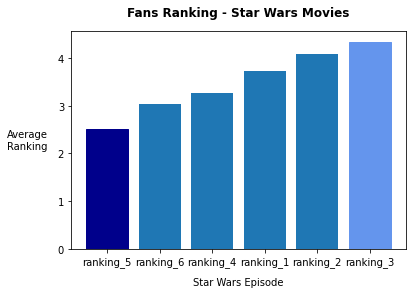

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

import textwrap

# Initialize the variable again to update the column names
ranking_columns = star_wars.columns[9:15]

mean_ranking = star_wars.loc[1:, ranking_columns].mean().sort_values()
print(mean_ranking)

plt.title('Fans Ranking - Star Wars Movies', pad=15, fontweight='bold')
top_ranked_chart = plt.bar(mean_ranking.index, mean_ranking)
plt.xlabel('Star Wars Episode', labelpad=10)

# Wrapping the long Y label so it does not overlap with the ticks
plt.ylabel('\n'.join(textwrap.wrap('Average Ranking', 10)), rotation=0, labelpad=30, va='center')

# Setting different bar colors for max and min values
top_ranked_chart[0].set_color('darkblue')
top_ranked_chart[5].set_color('cornflowerblue')

`Star Wars: Episode V The Empire Strikes Back` is the most popular of the series whereas `Star Wars: Episode III Revenge of the Sith` is the least liked one.

Interestingly, the latest three movies are also the top ranked ones. This might be an indication of [recency bias](https://en.wikipedia.org/wiki/Recency_bias) in the survey responders.

## **Most Watched Star Wars Movie**

seen_5    758
seen_6    738
seen_1    673
seen_4    607
seen_2    571
seen_3    550
dtype: int64


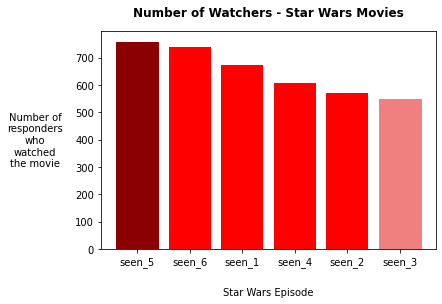

In [89]:
# Initialize the variable again to update the column names
multiple_choice_columns = star_wars.columns[3:9]

times_watched = star_wars.loc[1:,multiple_choice_columns].sum().sort_values(ascending=False)
print(times_watched)

plt.title('Number of Watchers - Star Wars Movies', pad=15, fontweight='bold')
most_watched_chart = plt.bar(times_watched.index, times_watched, color='red')
plt.xlabel('Star Wars Episode', labelpad=20)

# Wrapping the long Y label so it does not overlap with the ticks
plt.ylabel('\n'.join(textwrap.wrap('Number of responders who watched the movie', 10)), rotation=0, labelpad=40, va='center')

# Setting different bar colors for max and min values
most_watched_chart[0].set_color('darkred')
most_watched_chart[5].set_color('lightcoral')

Unsurprisingly, **the Most-watched ranking is almost identical to the Top-rated one**: `Star Wars: Episode V The Empire Strikes Back` is also the most watched of the series while `Star Wars: Episode III Revenge of the Sith` is also the least watched one.

## **Survey Segmentation**

In [101]:
# Define segments based on gender
men = star_wars[star_wars["Gender"] == "Male"]
women = star_wars[star_wars["Gender"] == "Female"]

### **Top Ranked** Star Wars Movie among **men**

ranking_5    2.458629
ranking_4    2.997636
ranking_6    3.002364
ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
dtype: float64


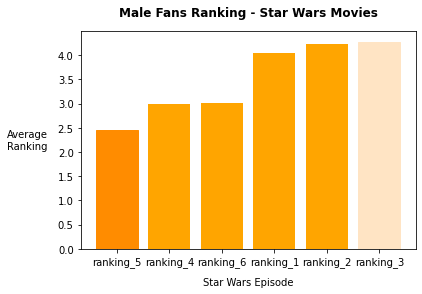

In [91]:
men_mean_ranking = men.loc[1:, ranking_columns].mean().sort_values()

print(men_mean_ranking)

plt.title('Male Fans Ranking - Star Wars Movies', pad=15, fontweight='bold')
top_men_chart = plt.bar(men_mean_ranking.index, men_mean_ranking, color='orange')
plt.xlabel('Star Wars Episode', labelpad=10)

# Wrapping the long Y label so it does not overlap with the ticks
plt.ylabel('\n'.join(textwrap.wrap('Average Ranking', 10)), rotation=0, labelpad=30, va='center')

# Setting different bar colors for max and min values
top_men_chart[0].set_color('darkorange')
top_men_chart[5].set_color('bisque')

### **Top Ranked** Star Wars Movie among **women**

ranking_5    2.569270
ranking_6    3.078086
ranking_1    3.429293
ranking_4    3.544081
ranking_2    3.954660
ranking_3    4.418136
dtype: float64


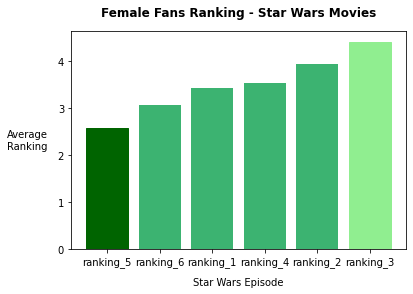

In [92]:
women_mean_ranking = women.loc[1:, ranking_columns].mean().sort_values()

print(women_mean_ranking)

plt.title('Female Fans Ranking - Star Wars Movies', pad=15, fontweight='bold')
top_women_chart = plt.bar(women_mean_ranking.index, women_mean_ranking, color='mediumseagreen')
plt.xlabel('Star Wars Episode', labelpad=10)

# Wrapping the long Y label so it does not overlap with the ticks
plt.ylabel('\n'.join(textwrap.wrap('Average Ranking', 10)), rotation=0, labelpad=30, va='center')

# Setting different bar colors for max and min values
top_women_chart[0].set_color('darkgreen')
top_women_chart[5].set_color('lightgreen')

`The top-ranked (Episode V) and the two lowest-ranked movies are the same for both genders`. There is, then, little variation in this regard.

### **Most Watched** Star Wars Movie among **men**

seen_5    392
seen_6    387
seen_1    361
seen_4    342
seen_2    323
seen_3    317
dtype: int64


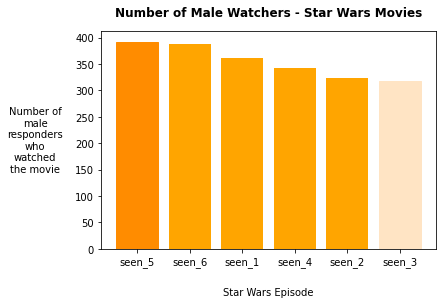

In [93]:
men_times_watched = men[multiple_choice_columns].sum().sort_values(ascending=False)
print(men_times_watched)

plt.title('Number of Male Watchers - Star Wars Movies', pad=15, fontweight='bold')
most_watched_men_chart = plt.bar(men_times_watched.index, men_times_watched, color='orange')
plt.xlabel('Star Wars Episode', labelpad=20)

# Wrapping the long Y label so it does not overlap with the ticks
plt.ylabel('\n'.join(textwrap.wrap('Number of male responders who watched the movie', 10)), rotation=0, labelpad=40, va='center')

# Setting different bar colors for max and min values
most_watched_men_chart[0].set_color('darkorange')
most_watched_men_chart[5].set_color('bisque')

### **Most Watched** Star Wars Movie among **women**

seen_5    353
seen_6    338
seen_1    298
seen_4    255
seen_2    237
seen_3    222
dtype: int64


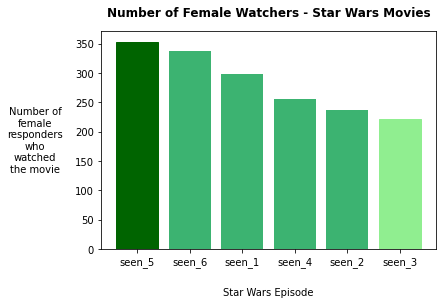

In [94]:
women_times_watched = women[multiple_choice_columns].sum().sort_values(ascending=False)
print(women_times_watched)

plt.title('Number of Female Watchers - Star Wars Movies', pad=15, fontweight='bold')
most_watched_women_chart = plt.bar(women_times_watched.index, women_times_watched, color='mediumseagreen')
plt.xlabel('Star Wars Episode', labelpad=20)

# Wrapping the long Y label so it does not overlap with the ticks
plt.ylabel('\n'.join(textwrap.wrap('Number of female responders who watched the movie', 10)), rotation=0, labelpad=40, va='center')

# Setting different bar colors for max and min values
most_watched_women_chart[0].set_color('darkgreen')
most_watched_women_chart[5].set_color('lightgreen')

Regarding the number of watchers, the ranking is actually identical for men and women. There is no gender disparity whatsoever.

## **Star Wars Characters' Likeability** 

In [95]:
character_columns = star_wars.columns[15:29]

pd.unique(star_wars[character_columns[0]])

array(['Han Solo', 'Very favorably', nan, 'Somewhat favorably',
       'Neither favorably nor unfavorably (neutral)',
       'Somewhat unfavorably', 'Unfamiliar (N/A)', 'Very unfavorably'],
      dtype=object)

In [96]:
# Create a dictionary to translate character rates into numbers
rate_to_number = {'Very favorably':2, 
                  'Somewhat favorably':1, 
                  'Neither favorably nor unfavorably (neutral)':0, 
                  'Somewhat unfavorably':-1, 
                  'Very unfavorably':-2, 
                  'Unfamiliar (N/A)':0, 
                  np.NaN:0}

# Loop over each of the columns containing data about individual movies 
# and translate format
for e in character_columns:
    star_wars[e] = star_wars[e].map(rate_to_number)
    
star_wars[character_columns].head()

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,-1.0,2.0,2.0,2.0,2.0,2.0


In [97]:
# Rename the columns to a cleaner and more intuitive name
star_wars = star_wars.rename(columns={'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.':'Han Solo',
                                      'Unnamed: 16':'Luke Skywalker',
                                      'Unnamed: 17':'Princess Leia Organa',
                                      'Unnamed: 18':'Anakin Skywalker',
                                      'Unnamed: 19':'Obi Wan Kenobi',
                                      'Unnamed: 20':'Emperor Palpatine',
                                      'Unnamed: 21':'Darth Vader',
                                      'Unnamed: 22':'Lando Calrissian',
                                      'Unnamed: 23':'Boba Fett',
                                      'Unnamed: 24':'C-3P0',
                                      'Unnamed: 25':'R2 D2',
                                      'Unnamed: 26':'Jar Jar Binks',
                                      'Unnamed: 27':'Padme Amidala',
                                      'Unnamed: 28':'Yoda',})

# Initialize the variable again to update the column names
character_columns = star_wars.columns[15:29]

star_wars[character_columns].head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,-1.0,2.0,2.0,2.0,2.0,2.0


Han Solo                1361.0
Yoda                    1330.0
Obi Wan Kenobi          1319.0
Luke Skywalker          1304.0
R2 D2                   1287.0
Princess Leia Organa    1280.0
C-3P0                   1140.0
Anakin Skywalker         598.0
Lando Calrissian         428.0
Padme Amidala            393.0
Darth Vader              391.0
Boba Fett                243.0
Emperor Palpatine         47.0
Jar Jar Binks           -156.0
dtype: float64


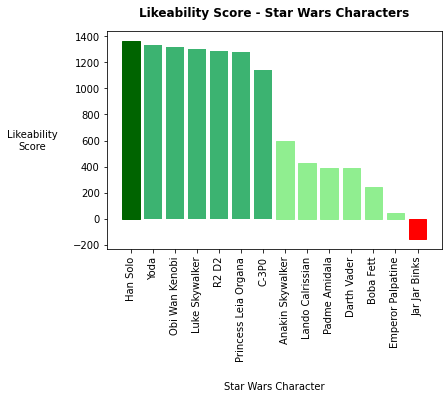

In [98]:
fav_characters = star_wars.loc[1:,character_columns].sum().sort_values(ascending=False)

print(fav_characters)

plt.title('Likeability Score - Star Wars Characters', pad=15, fontweight='bold')
fav_characters_chart = plt.bar(fav_characters.index, fav_characters, color='mediumseagreen')
plt.xlabel('Star Wars Character', labelpad=20)

# Wrapping the Y label so it does not overlap with the ticks
plt.ylabel('\n'.join(textwrap.wrap('Likeability Score', 12)), rotation=0, labelpad=40, va='center')

plt.xticks(rotation=90)

# Setting different bar colors for max and min values
fav_characters_chart[0].set_color('darkgreen')
for e in range(7,13):
    fav_characters_chart[e].set_color('lightgreen')
fav_characters_chart[13].set_color('red')

`Han Solo is the favorite Star Wars character among the survey responders.` However, there are other 6 characters who have high likeability scores as well: Yoda, Obi Wan Kenobi, Luke Skywalker, R2-D2, Princess Leia, and C-3PO. It seems that Star Wars fan love is widely shared.

`The only character who is generally disliked` (featuring a negative score) `is Jar Jar Binks.`

In [99]:
# Calculate the standard deviation for each character column to assess controversy
controverted_characters = star_wars.loc[1:,character_columns].std().sort_values(ascending=False)

print(controverted_characters)

Darth Vader             1.292659
Jar Jar Binks           1.115855
Anakin Skywalker        1.000624
Emperor Palpatine       0.983036
Yoda                    0.968933
Obi Wan Kenobi          0.959995
C-3P0                   0.954764
R2 D2                   0.950416
Princess Leia Organa    0.942458
Han Solo                0.937353
Luke Skywalker          0.926979
Boba Fett               0.886472
Padme Amidala           0.880532
Lando Calrissian        0.785708
dtype: float64


Interestingly enough, `Darth Vader, the great villain of the series, is the most controversial character`, based on the fans' answers. Some people hate him and others love him.

## **Conclusion**

According to the analyzed survey of more than a thousand Star Wars fans:

- `Star Wars: Episode V The Empire Strikes Back` is the most popular of the series whereas `Star Wars: Episode III Revenge of the Sith` is the least liked one.

- The Most-watched ranking is almost identical to the Top-rated one.

- There is no gender disparity when it comes to Star Wars movies taste.

- **Han Solo** is the favorite Star Wars character.

- The only character who is generally disliked is **Jar Jar Binks**.

- **Darth Vader**, the great villain of the series, is the most controversial character.